<a href="https://colab.research.google.com/github/VladislavGubarev/programming-practice/blob/main/%D0%93%D1%83%D0%B1%D0%B0%D1%80%D0%B5%D0%B2_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_7_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


# функция для отправки запроса
def send_request(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print('Response code:', response.status_code)
        return False


# отчистка данных
def clear_data(data):
    # определение даты
    current_date = datetime.today().date()
    day = current_date.day
    month = current_date.month
    current_date = f'{day}.{month}'

    # определение температуры
    temperature = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    # определение погодных условии
    weather_code = data['current']['weather_code']
    bad_weather = [51, 53, 55, 61, 63, 65, 71, 73, 75, 80, 81, 82 ]
    if weather_code in [0, 1]:
        message = 'нет осадков, ясно'
    elif weather_code == 45:
        message = 'нет осадков, туман'
    elif weather_code in bad_weather:
        message = 'осадки, без тумана'
    else:
        message = 'посмотри в окно'

    message = f'Сегодня ({current_date}) погода {temperature} {temperature_format}, {message}'

    return message


# основная функция
def main():
    coordinates = input('Введите ваши координаты:\n').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code'
    data = send_request(url)
    print(clear_data(data))


if __name__ == '__main__':
    main()

Введите ваши координаты:
56.50, 60.35
Сегодня (3.11) погода -4.7 °C, посмотри в окно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests

def get_pokemon_list():
    url = 'https://pokeapi.co/api/v2/pokemon'
    params = {'limit': 20}  # Получаем первых 20 покемонов
    response = requests.get(url, params=params)

    if response.status_code == 200:
        data = response.json()
        pokemon_names = [pokemon['name'] for pokemon in data['results']]
        print("Список первых 20 покемонов:")
        for name in pokemon_names:
            print(name)
        return pokemon_names
    else:
        print("Ошибка при получении списка покемонов.")
        return []

def get_pokemon_details(pokemon_name):
    url = f'https://pokeapi.co/api/v2/pokemon/{pokemon_name.lower()}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()


        name = data['name']
        types = [t['type']['name'] for t in data['types']]
        weight = data['weight']
        height = data['height']
        abilities = [a['ability']['name'] for a in data['abilities']]


        print(f"\nИнформация о покемоне {name.capitalize()}:")
        print(f"Имя: {name.capitalize()}")
        print(f"Тип: {', '.join(types)}")
        print(f"Вес: {weight}")
        print(f"Рост: {height}")
        print(f"Способности: {', '.join(abilities)}")
    else:
        print("Ошибка: не удалось получить данные о покемоне.")

def main():

    pokemon_names = get_pokemon_list()

    if pokemon_names:

        pokemon_name = input("\nВведите имя покемона из списка: ").strip().lower()

        if pokemon_name in pokemon_names:

            get_pokemon_details(pokemon_name)
        else:
            print("Ошибка: введенное имя покемона отсутствует в списке.")

if __name__ == '__main__':
    main()


Список первых 20 покемонов:
bulbasaur
ivysaur
venusaur
charmander
charmeleon
charizard
squirtle
wartortle
blastoise
caterpie
metapod
butterfree
weedle
kakuna
beedrill
pidgey
pidgeotto
pidgeot
rattata
raticate

Введите имя покемона из списка: pidgeot

Информация о покемоне Pidgeot:
Имя: Pidgeot
Тип: normal, flying
Вес: 395
Рост: 15
Способности: keen-eye, tangled-feet, big-pecks


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests

def get_posts():
    url = 'https://jsonplaceholder.typicode.com/posts'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Ошибка при получении списка постов.")
        return []

def get_post_by_id(post_id):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Ошибка: не удалось получить данные о посте.")
        return None

def display_post_info(post):
    if post:
        print("\nИнформация о посте:")
        print(f"ID: {post['id']}")
        print(f"User ID: {post['userId']}")
        print(f"Заголовок: {post['title']}")
        print(f"Содержание: {post['body']}")
    else:
        print("Ошибка: передан неверный объект поста.")

def main():
    posts = get_posts()
    if posts:
        print("Список постов успешно загружен.")
        try:
            post_id = int(input("\nВведите ID поста для просмотра: "))
            post = get_post_by_id(post_id)
            display_post_info(post)
        except ValueError:
            print("Ошибка: введите корректный числовой ID.")
    else:
        print("Ошибка при загрузке постов.")

if __name__ == '__main__':
    main()


Список постов успешно загружен.

Введите ID поста для просмотра: 19

Информация о посте:
ID: 19
User ID: 2
Заголовок: adipisci placeat illum aut reiciendis qui
Содержание: illum quis cupiditate provident sit magnam
ea sed aut omnis
veniam maiores ullam consequatur atque
adipisci quo iste expedita sit quos voluptas


## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests

def create_post(title, body, user_id):
    url = 'https://jsonplaceholder.typicode.com/posts'
    data = {
        'title': title,
        'body': body,
        'userId': user_id
    }
    response = requests.post(url, json=data)
    if response.status_code == 201:
        return response.json()
    else:
        print("Ошибка при создании поста.")
        return None

def update_post(post_id, new_title, new_body):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    data = {
        'title': new_title,
        'body': new_body
    }
    response = requests.put(url, json=data)
    if response.status_code == 200:
        return response.json()
    else:
        print("Ошибка при обновлении поста.")
        return None

def delete_post(post_id):
    url = f'https://jsonplaceholder.typicode.com/posts/{post_id}'
    response = requests.delete(url)
    return response.status_code

def main():
    title = input("Введите заголовок поста: ")
    body = input("Введите содержимое поста: ")
    user_id = input("Введите ID пользователя: ")

    created_post = create_post(title, body, user_id)
    if created_post:
        print("\nСозданный пост:")
        print(created_post)

    post_id = int(input("\nВведите ID поста для обновления: "))
    new_title = input("Введите новый заголовок: ")
    new_body = input("Введите новое содержимое: ")

    updated_post = update_post(post_id, new_title, new_body)
    if updated_post:
        print("\nОбновленный пост:")
        print(updated_post)

    post_id_to_delete = int(input("\nВведите ID поста для удаления: "))
    delete_status = delete_post(post_id_to_delete)
    print(f"\nСтатус-код удаления: {delete_status}")

if __name__ == '__main__':
    main()


Введите заголовок поста: 1
Введите содержимое поста: 1
Введите ID пользователя: 1

Созданный пост:
{'title': '1', 'body': '1', 'userId': '1', 'id': 101}

Введите ID поста для обновления: 101
Введите новый заголовок: 1
Введите новое содержимое: 1
Ошибка при обновлении поста.

Введите ID поста для удаления: 1

Статус-код удаления: 200


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Список доступных пород собак:
1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeran

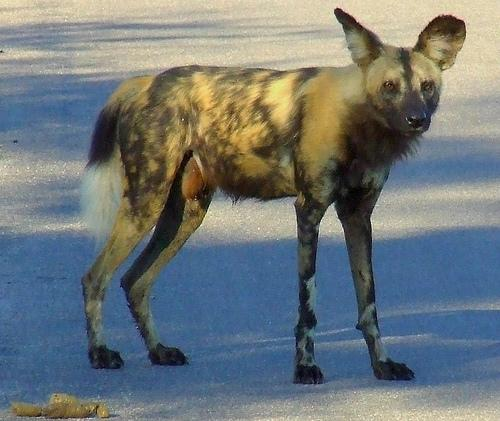


Изображение для породы Chow:


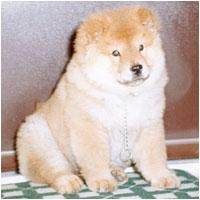


Изображение для породы Dingo:


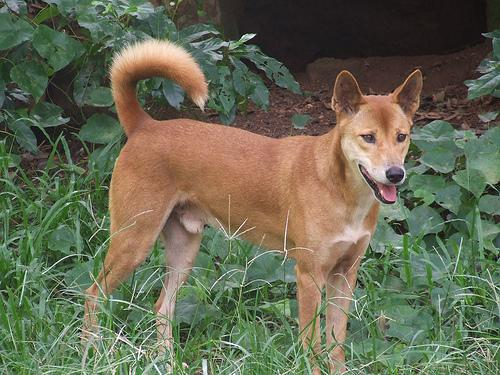

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io

def get_breeds():
    url = 'https://dog.ceo/api/breeds/list/all'
    response = requests.get(url)
    if response.status_code == 200:
        breeds = response.json()['message']
        breed_list = list(breeds.keys())
        print("Список доступных пород собак:")
        for i, breed in enumerate(breed_list, start=1):
            print(f"{i}. {breed}")
        return breed_list
    else:
        print("Ошибка при получении списка пород.")
        return []

def get_images_for_breeds(breeds):
    for breed in breeds:
        url = f'https://dog.ceo/api/breed/{breed}/images/random'
        response = requests.get(url)
        if response.status_code == 200:
            image_url = response.json()['message']
            img_response = requests.get(image_url)
            img = Image.open(io.BytesIO(img_response.content))
            print(f"\nИзображение для породы {breed.capitalize()}:")
            display(img)
        else:
            print(f"Ошибка: не удалось получить изображение для породы {breed}.")

def main():
    breeds = get_breeds()
    if not breeds:
        return

    breed_input = input("\nВведите названия пород через запятую: ").strip().lower()
    selected_breeds = [breed.strip() for breed in breed_input.split(',') if breed.strip() in breeds]

    if selected_breeds:
        get_images_for_breeds(selected_breeds)
    else:
        print("Ошибка: ни одна из введенных пород не найдена в списке доступных пород.")

if __name__ == '__main__':
    main()
